In [21]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from dataPath import DATA_PATH
%matlplotlib inline

import matplotlib

matplotlib.rcParams['figure.figsize'] = (10, 10)
matplotlib.rcParams['image.cmap'] = 'gray'

UsageError: Line magic function `%matlplotlib` not found.


In [22]:
videoFileName = DATA_PATH + "videos/cycle.mp4"

cap = cv.VideoCapture(videoFileName)
width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

out = cv.VideoWriter('sparse-output.mp4', cv.VideoWriter_fourcc(*'MP4V'), 20, (width, height))

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Detect Corners for tracking them

In [23]:
#params for ShiTomasi corner detections
numCorners = 100
feature_params = dict(
    maxCorners=numCorners,
    qualityLevel=0.3,
    minDistance=7,
    blockSize=7
)

Setup the Lucas Kanade Tracker

In [24]:
# Parameters for lucas kanade optical flow
lk_params = dict(
    winSize = (15, 15),
    maxLevel = 2,
    criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))

/var/folders/nj/yfdjzlhj4ng_ndb0wp1g5rcm0000gn/T/ipykernel_2341/832629768.py:23: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv.line(mask, (a, b), (c, d), color[i].tolist(), 2, cv.LINE_AA)
/var/folders/nj/yfdjzlhj4ng_ndb0wp1g5rcm0000gn/T/ipykernel_2341/832629768.py:24: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv.circle(frame, (a, b), 3, color[i].tolist(), -1)


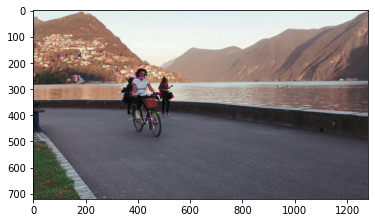

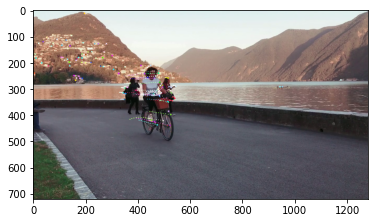

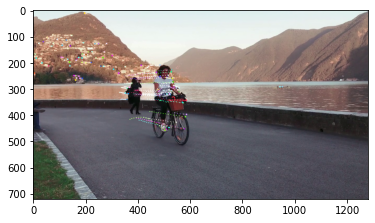

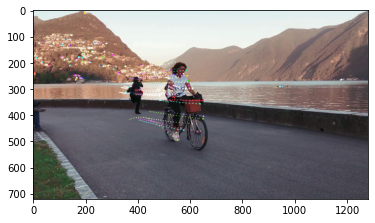

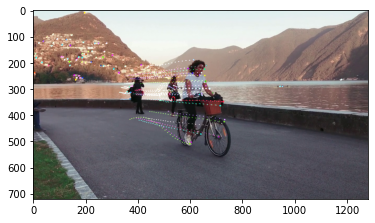

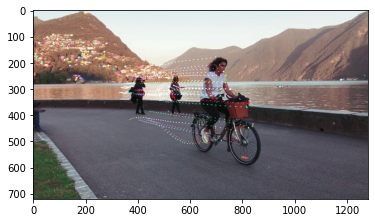

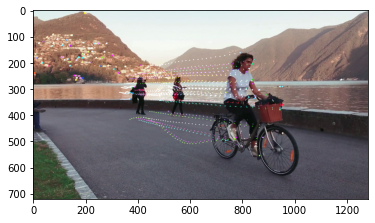

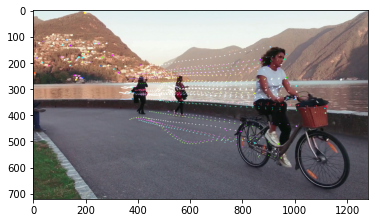

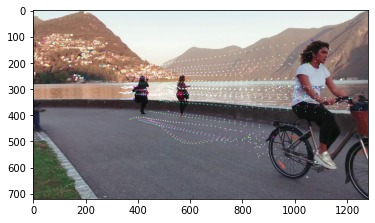

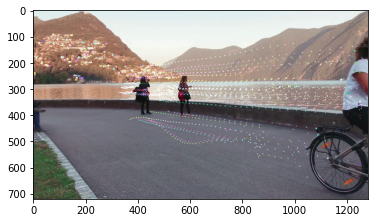

In [25]:
color = np.random.randint(0, 255, (numCorners, 3))

ret, old_frame = cap.read()
old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
old_points = cv.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

mask = np.zeros_like(old_frame)
count = 0
while True:
    ret, frame = cap.read()
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    count += 1

    # calculate optical flow
    new_points, status, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, old_points, None, **lk_params)

    good_new = new_points[status == 1]
    good_old = old_points[status == 1]

    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        cv.line(mask, (a, b), (c, d), color[i].tolist(), 2, cv.LINE_AA)
        cv.circle(frame, (a, b), 3, color[i].tolist(), -1)

    #display every 5th frame
    display_frame = cv.add(frame, mask)
    out.write(display_frame)

    if count % 5 == 0:
        plt.imshow(display_frame[..., ::-1])
        plt.show()

    if count > 50:
        break

    old_gray = frame_gray.copy()
    old_points = good_new.reshape(-1, 1, 2)

cap.release()
out.release()
